In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier





mnist = fetch_openml('mnist_784', version=1)
df = pd.DataFrame(mnist.data)
df['target'] = mnist.target.astype(int)

X, y = mnist["data"], mnist["target"].astype(int)

5


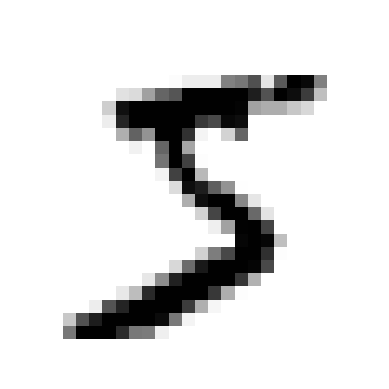

In [2]:
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

print(y[0])
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [3]:
# train - test split with stratification
test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in test_split.split(df, df["target"]):
    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[test_index], y.loc[test_index]

print(y_train.value_counts().sort_index() / len(X_train))
print(y_test.value_counts().sort_index() / len(X_test))

class
0    0.098607
1    0.112536
2    0.099857
3    0.102018
4    0.097482
5    0.090179
6    0.098232
7    0.104179
8    0.097500
9    0.099411
Name: count, dtype: float64
class
0    0.098643
1    0.112500
2    0.099857
3    0.102000
4    0.097500
5    0.090214
6    0.098214
7    0.104214
8    0.097500
9    0.099357
Name: count, dtype: float64


In [4]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# accuracy bad because dataset is unbalanced

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print(confusion_matrix(y_train_5, y_train_pred))
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

[[50550   400]
 [ 1600  3450]]
0.8961038961038961
0.6831683168316832


In [5]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

b:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1102.40044114])

In [6]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [7]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

(0.0, 1.01)

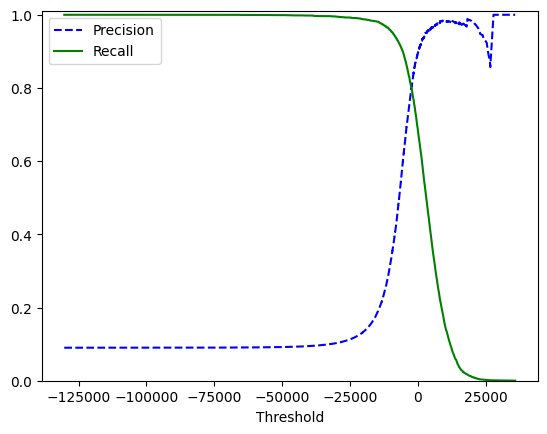

In [8]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0, 1.01])

0.9666493494884326


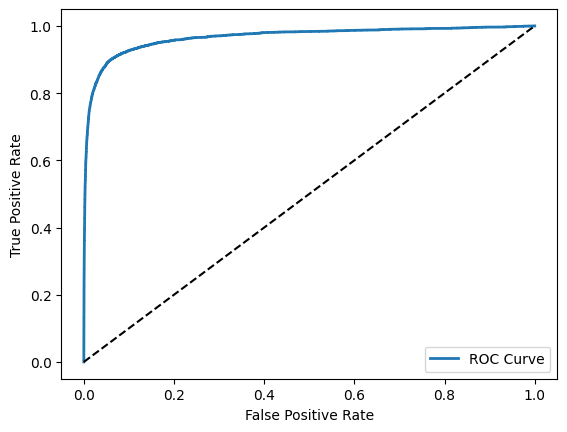

In [9]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
print(roc_auc_score(y_train_5, y_scores))
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

print(roc_auc_score(y_train_5, y_scores_forest))
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()